## 1 绘图

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(img, img_aug):
  fig, axs = plt.subplots(ncols=2, figsize=(12, 4), sharex=True, sharey=True)
  axs[0].imshow(img)
  axs[1].imshow(img_aug)   
  axs[0].axis('off')
  axs[1].axis('off')
  fig.tight_layout()
  plt.show()

## 2 翻转

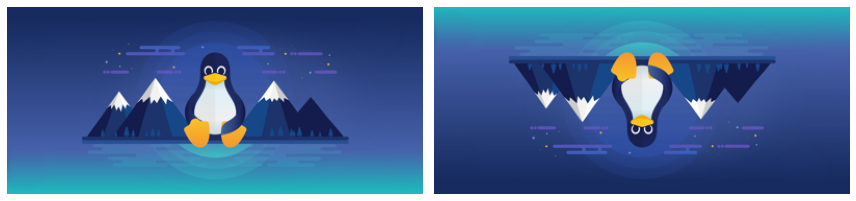

In [2]:
from PIL import Image
import numpy as np

def flip(img,axis=0):
  return np.flip(img,axis=axis)

img = Image.open('/content/linux-cover.jpeg').resize((400,180)) # 宽400，高180 
img_flip = flip(img, axis=0)
plot(img, img_flip)

## 3 旋转

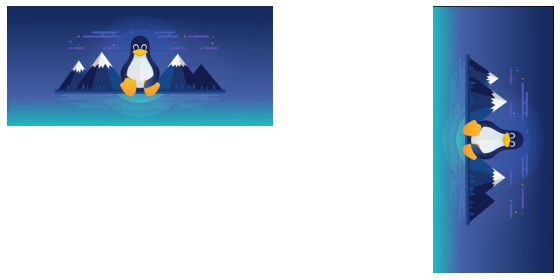

In [3]:
import math

def transform(img,angle=90,trans_func=None):
  angle = math.radians(angle)
  cosine = math.cos(angle)
  sine = math.sin(angle)
  width , height = img.size

  # 定义新的高宽
  new_height = round(abs(img.size[1]*cosine)+abs(img.size[0]*sine))+1
  new_width = round(abs(img.size[0]*cosine)+abs(img.size[1]*sine))+1

  # 定义的新的全0图
  output = np.zeros((new_height, new_width, np.asarray(img).shape[2]))

  # 找到图像中心
  original_centre_height = round(((img.size[1]+1)/2)-1)
  original_centre_width = round(((img.size[0]+1)/2)-1)
  
  # 旋转后的图像中心点
  new_centre_height= round(((new_height+1)/2)-1)
  new_centre_width= round(((new_width+1)/2)-1)

  for i in range(height):
    for j in range(width):
      # 相对于中心的点x,y
      y=img.size[1]-1-i-original_centre_height               
      x=img.size[0]-1-j-original_centre_width   

      # 旋转后的坐标轴
      new_y,new_x = trans_func(sine, cosine, x, y)

      # 根据新的中心调整坐标轴
      # new_y=new_centre_height-new_y
      # new_x=new_centre_width-new_x
      new_y=new_y+new_centre_height
      new_x=new_x+new_centre_width
      
      # 异常值检查
      if 0<=new_x<new_width and 0<=new_y<new_height and new_x>=0 and new_y>=0:
        output[new_y,new_x,:]=np.asarray(img)[i,j,:] 
  return output

def rotate_xy(sine, cosine, x, y):
  new_x, new_y = np.array([[cosine,sine],[-sine,cosine]])@(np.array([x,y]))
  return round(new_y),round(new_x)

img = Image.open('/content/linux-cover.jpeg').resize((400,180))
img_rotate = Image.fromarray((transform(img,angle=90,trans_func=rotate_xy)).astype(np.uint8))

fig, axs = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
axs[0].imshow(img)
axs[1].imshow(img_rotate)   
axs[0].axis('off')
axs[1].axis('off')
fig.tight_layout()
plt.show()

## 4 斜切

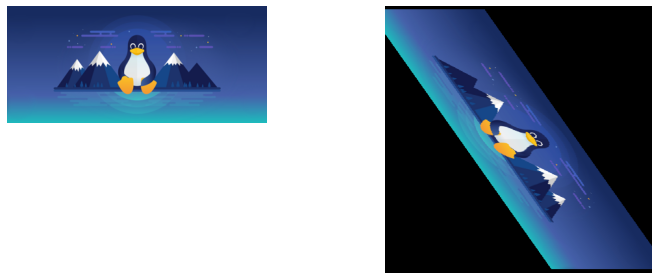

In [4]:
def shear_xy(sine, cosine, x, y):
  new_x, new_y = np.array([[sine,1],[1,0]])@(np.array([x,y]))
  return round(new_y),round(new_x)

img = Image.open('/content/linux-cover.jpeg').resize((400,180))
img_shear = Image.fromarray((transform(img,angle=45,trans_func=shear_xy)).astype(np.uint8))

fig, axs = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
axs[0].imshow(img)
axs[1].imshow(img_shear)   
axs[0].axis('off')
axs[1].axis('off')
fig.tight_layout()
plt.show()

## 5 平移

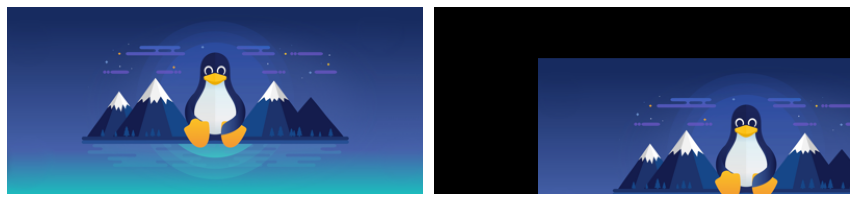

In [5]:
def shift_xy(x,y,wshift,hshift):
  new_x, new_y, _ = np.array([[1,0,wshift],[0,1,hshift],[0,0,1]])@(np.array([x,y,1]))
  return new_y, new_x

def shift(img, wshift=100, hshift=50):
  width, height = img.size
  output = np.zeros(np.asarray(img).shape)
  for y in range(height):
    for x in range(width):
      new_y, new_x = shift_xy(x,y,wshift,hshift)
      if 0<=new_x<width and 0<=new_y<height and new_x>=0 and new_y>=0:
        output[new_y, new_x ,:] = np.asarray(img)[y,x,:]
  return output  

img = Image.open('/content/linux-cover.jpeg').resize((400,180))
img_shift = Image.fromarray(shift(img).astype(np.uint8))

plot(img, img_shift)  

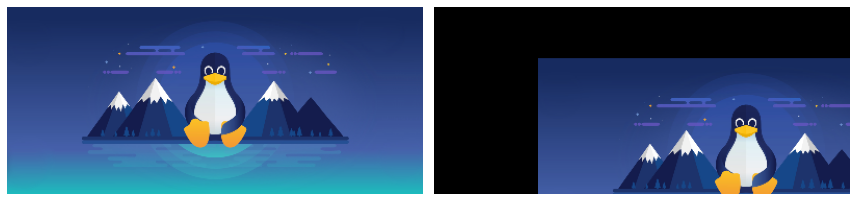

In [6]:
import cv2
# 读取图片 1 是加载彩色图像。任何图像的透明度都会被忽视。它是默认标志。
img = cv2.imread('/content/linux-cover.jpeg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,180))
rows, cols = img.shape[0:2]
M = np.float32([[1,0,100],[0,1,50]])  # 此平移相当与右平移100，再下平移50px
new_img = cv2.warpAffine(img, M, (cols, rows))  # 通过仿射变换函数来进行平移，M是平移矩阵
plot(img, new_img) 


## 6 缩放

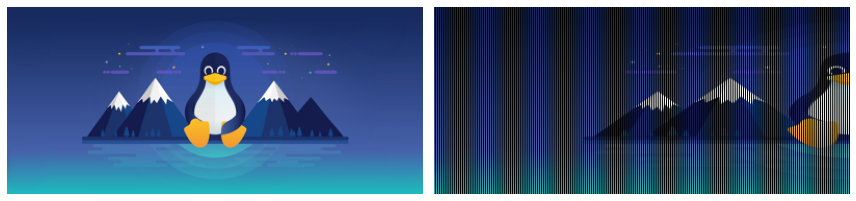

In [7]:
def zoom_xy(x,y,a,b):
  new_x, new_y = np.array([[a,0],[0,b]])@(np.array([x,y]))
  return new_y, new_x

def zoom(img, a=2,b=1):
  width, height = img.size
  output = np.zeros(np.asarray(img).shape)
  for y in range(height):
    for x in range(width):
      new_y, new_x = zoom_xy(x,y,a,b)
      if 0<=new_x<width and 0<=new_y<height and new_x>=0 and new_y>=0:
        output[new_y, new_x ,:] = np.asarray(img)[y,x,:]
  return output  

img = Image.open('/content/linux-cover.jpeg').resize((400,180))
img_zoom = Image.fromarray(zoom(img).astype(np.uint8))

plot(img, img_zoom)  

## 7 通道变换

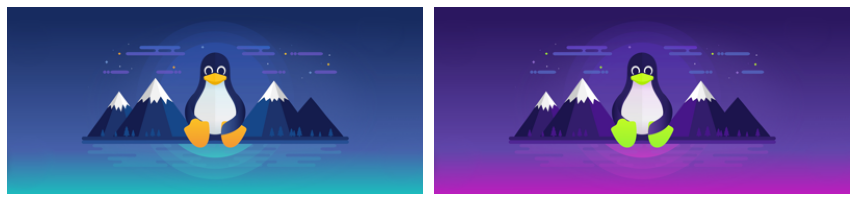

In [8]:
# channel shift
def channel(img, num=[1,0,2]):
  output = np.zeros(np.asarray(img).shape)
  output[:,:,0] = np.asarray(img)[:,:,num[0]]
  output[:,:,1] = np.asarray(img)[:,:,num[1]]
  output[:,:,2] = np.asarray(img)[:,:,num[2]]
  return output

img = Image.open('/content/linux-cover.jpeg').resize((400,180))
img_channel = Image.fromarray(channel(img).astype(np.uint8))

plot(img, img_channel) 

## 8 灰度转换

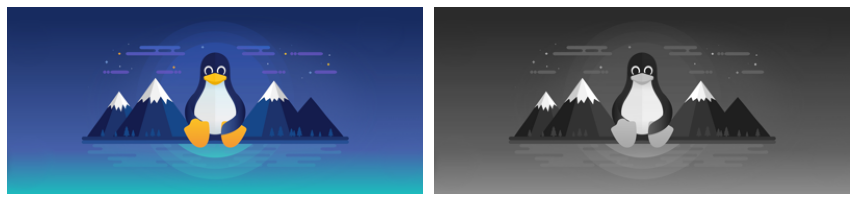

In [9]:
def grayscale(img):
  coef = np.array([[[0.299, 0.587, 0.114]]])  # rgb to gray (YCbCr)
  gray = np.sum(np.asarray(img) * coef, axis=2)
  output = np.dstack((gray, gray, gray))
  return output

img = Image.open('/content/linux-cover.jpeg').resize((400,180))
img_grayscale = Image.fromarray(grayscale(img).astype(np.uint8))

plot(img, img_grayscale) 

## 9 对比度转换

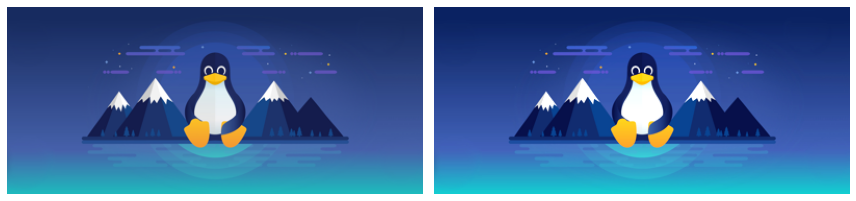

In [10]:
def contrast(img,alpha=1.2):
  coef = np.array([[[0.299, 0.587, 0.114]]])  # rgb to gray (YCbCr)
  gray = np.asarray(img) * coef
  gray = (3.0 * (1.0 - alpha) / gray.size) * np.sum(gray)
  output = alpha * np.asarray(img) + gray
  output = np.clip(output, 0., 255.)
  return output

img = Image.open('/content/linux-cover.jpeg').resize((400,180))
img_contrast = Image.fromarray(contrast(img).astype(np.uint8))

plot(img, img_contrast) 

## 10 亮度转换

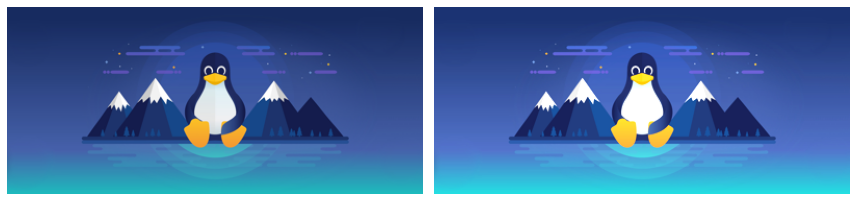

In [11]:
def brightness(img,alpha=1.2):
  output = alpha * np.asarray(img)
  output = np.clip(output, 0., 255.)
  return output

img = Image.open('/content/linux-cover.jpeg').resize((400,180))
img_brightness = Image.fromarray(brightness(img).astype(np.uint8))

plot(img, img_brightness) 

## 11 饱和度转换

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


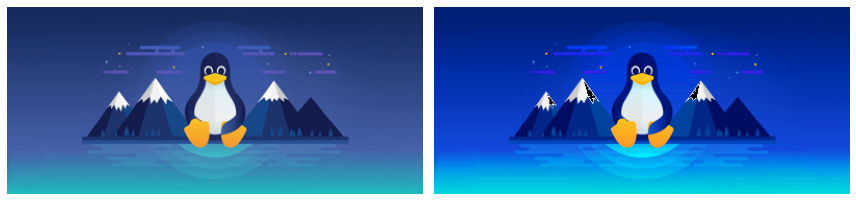

In [12]:
def saturation(rgb_img, increment=0.5):
    img = rgb_img * 1.0
    img_min = img.min(axis=2)
    img_max = img.max(axis=2)
    img_out = img
    
    #获取HSL空间的饱和度和亮度
    delta = (img_max - img_min) / 255.0
    value = (img_max + img_min) / 255.0
    L = value/2.0
    
    # s = L<0.5 ? s1 : s2
    mask_1 = L < 0.5
    s1 = delta/(value)
    s2 = delta/(2 - value)
    s = s1 * mask_1 + s2 * (1 - mask_1)
    
    # 增量大于0，饱和度指数增强
    if increment >= 0 :
        # alpha = increment+s > 1 ? alpha_1 : alpha_2
        temp = increment + s
        mask_2 = temp >  1
        alpha_1 = s
        alpha_2 = s * 0 + 1 - increment
        alpha = alpha_1 * mask_2 + alpha_2 * (1 - mask_2)
        
        alpha = 1/alpha -1 
        img_out[:, :, 0] = img[:, :, 0] + (img[:, :, 0] - L * 255.0) * alpha
        img_out[:, :, 1] = img[:, :, 1] + (img[:, :, 1] - L * 255.0) * alpha
        img_out[:, :, 2] = img[:, :, 2] + (img[:, :, 2] - L * 255.0) * alpha
        
    # 增量小于0，饱和度线性衰减
    else:
        alpha = increment
        img_out[:, :, 0] = img[:, :, 0] + (img[:, :, 0] - L * 255.0) * alpha
        img_out[:, :, 1] = img[:, :, 1] + (img[:, :, 1] - L * 255.0) * alpha
        img_out[:, :, 2] = img[:, :, 2] + (img[:, :, 2] - L * 255.0) * alpha
    
    img_out = img_out/255.0
    
    # RGB颜色上下限处理(小于0取0，大于1取1)
    mask_3 = img_out  < 0 
    mask_4 = img_out  > 1
    img_out = img_out * (1-mask_3)
    img_out = img_out * (1-mask_4) + mask_4
    
    return img_out*255
 

# increment = 0.5  # 范围-1到1
img = Image.open('/content/linux-cover.jpeg').resize((400,180))
img_saturation = Image.fromarray(saturation(np.asarray(img)).astype(np.uint8))

plot(img, img_saturation) 

## 12 裁剪

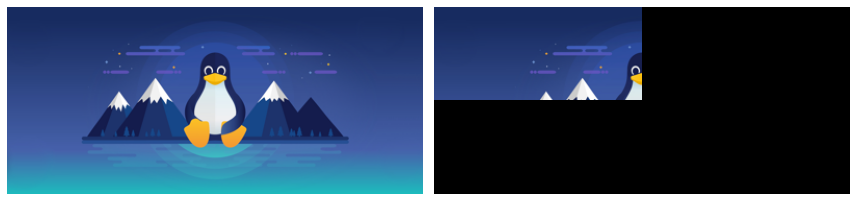

In [13]:
def crop(img, left=0, upper=0, right=200, lower=90):
  output = np.zeros(np.asarray(img).shape)
  output[upper:lower,left:right,:] = np.asarray(img)[upper:lower,left:right,:]
  return output

img = Image.open('/content/linux-cover.jpeg').resize((400,180)) # 宽400，高180
img_crop = Image.fromarray(crop(img).astype(np.uint8))

plot(img, img_crop)